In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow seaborn scipy plotly

In [2]:
!git clone https://github.com/RUGameLink/Project-E.git
!cp Project-E/alt_model_gc/*.py ./

Cloning into 'Project-E'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 120 (delta 29), reused 111 (delta 20), pack-reused 0 (from 0)
Receiving objects: 100% (120/120), 13.66 MiB | 13.76 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [3]:
from radon_analysis import *
from radon_models import *
from radon_prediction import *

In [4]:
# Загрузка собственных данных
from google.colab import files
uploaded = files.upload()  # Загрузите CSV-файл с данными

# Загрузка и предобработка данных
data = load_data(list(uploaded.keys())[0])

Saving data.csv to data.csv
Пропущенные значения до заполнения:
Radon (Bq.m3)        9
Temperature (¡C)    55
Pressure (mBar)      0
dtype: int64

Пропущенные значения после заполнения:
Radon (Bq.m3)       0
Temperature (¡C)    0
Pressure (mBar)     0
dtype: int64


/content/radon_analysis.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


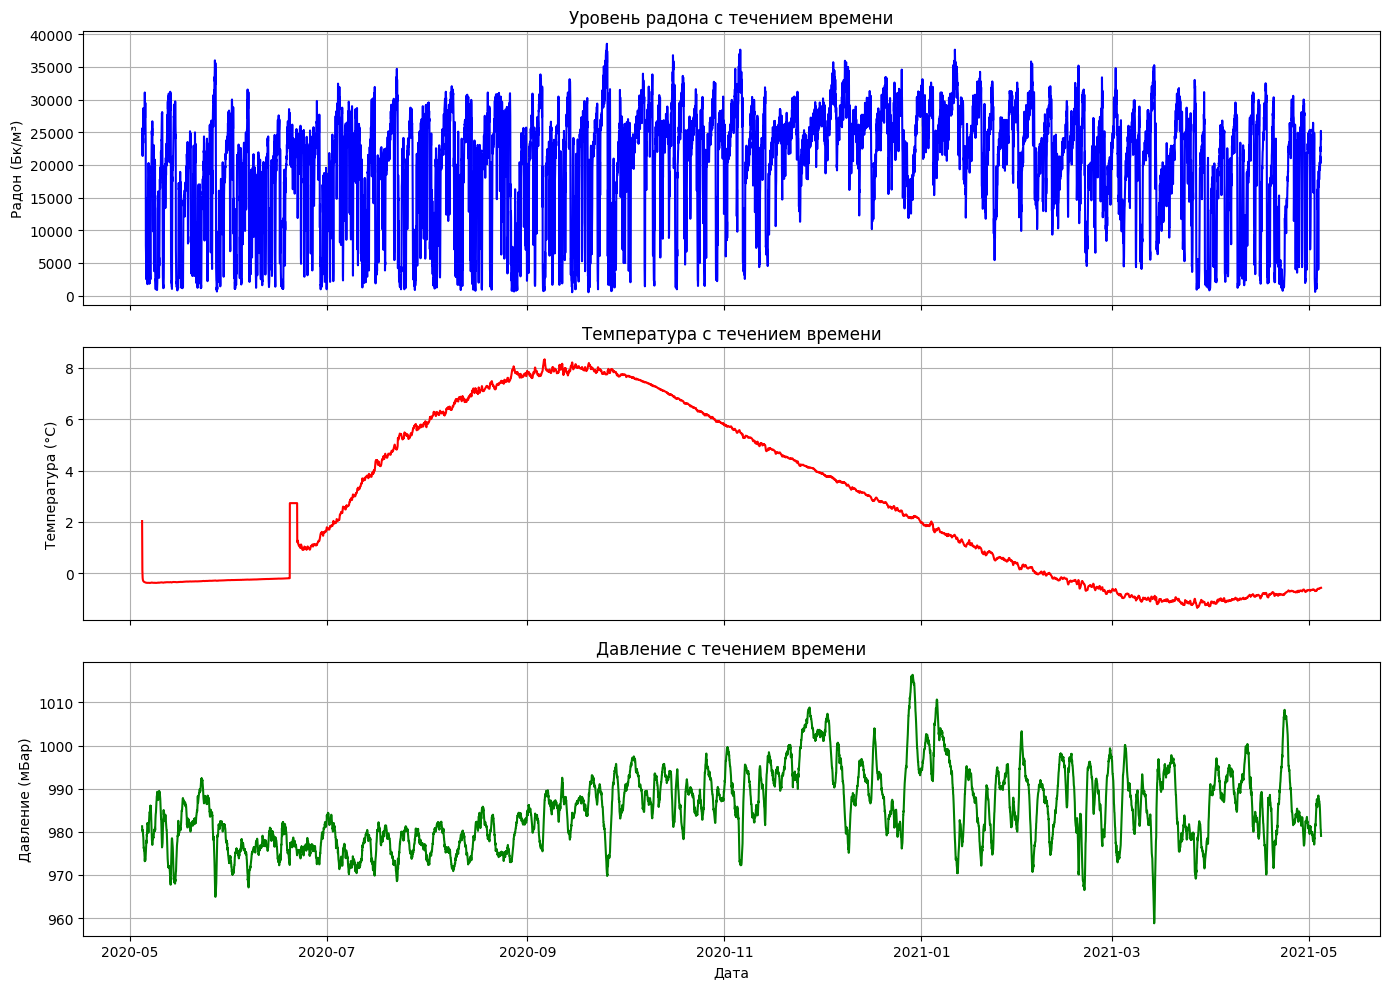

In [5]:
# Визуализация временных рядов
plot_time_series(data)

Корреляция между радоном и температурой: 0.0800 (p-значение: 0.0000)
Корреляция между радоном и давлением: -0.0011 (p-значение: 0.9165)
Корреляция между температурой и давлением: 0.0261 (p-значение: 0.0144)


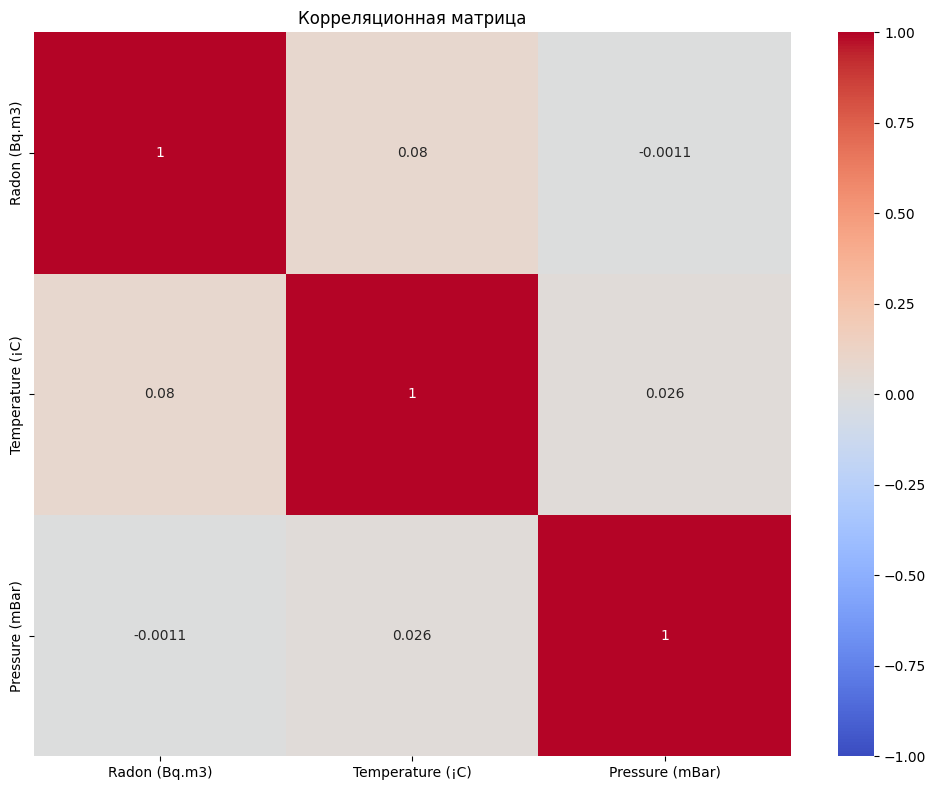

In [6]:
# Анализ корреляций
corr_matrix = analyze_correlations(data)

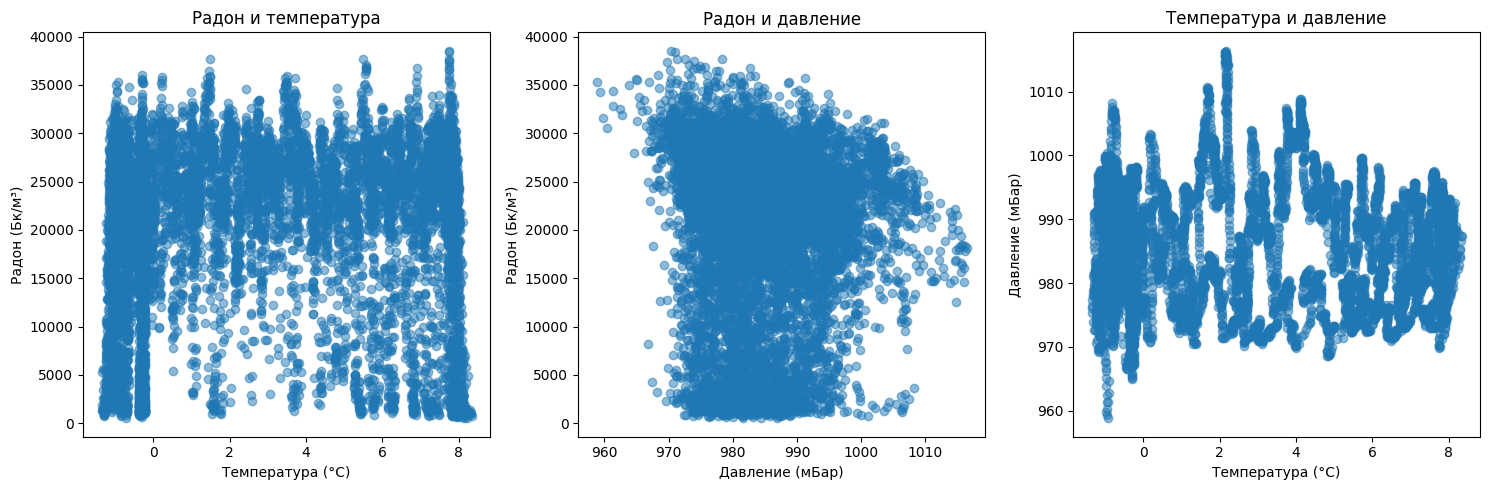

In [7]:
# Построение диаграмм рассеяния
plot_scatter_relationships(data)


Базовая статистика:
       Radon (Bq.m3)  Temperature (¡C)  Pressure (mBar)
count    8762.000000       8762.000000      8762.000000
mean    20022.478579          2.726995       985.274763
std      8623.103187          3.238559         8.782672
min       508.000000         -1.354161       958.782100
25%     15255.000000         -0.328124       978.377675
50%     22261.000000          2.059225       984.363240
75%     26329.000000          5.850701       991.461744
max     38533.000000          8.338097      1016.420816


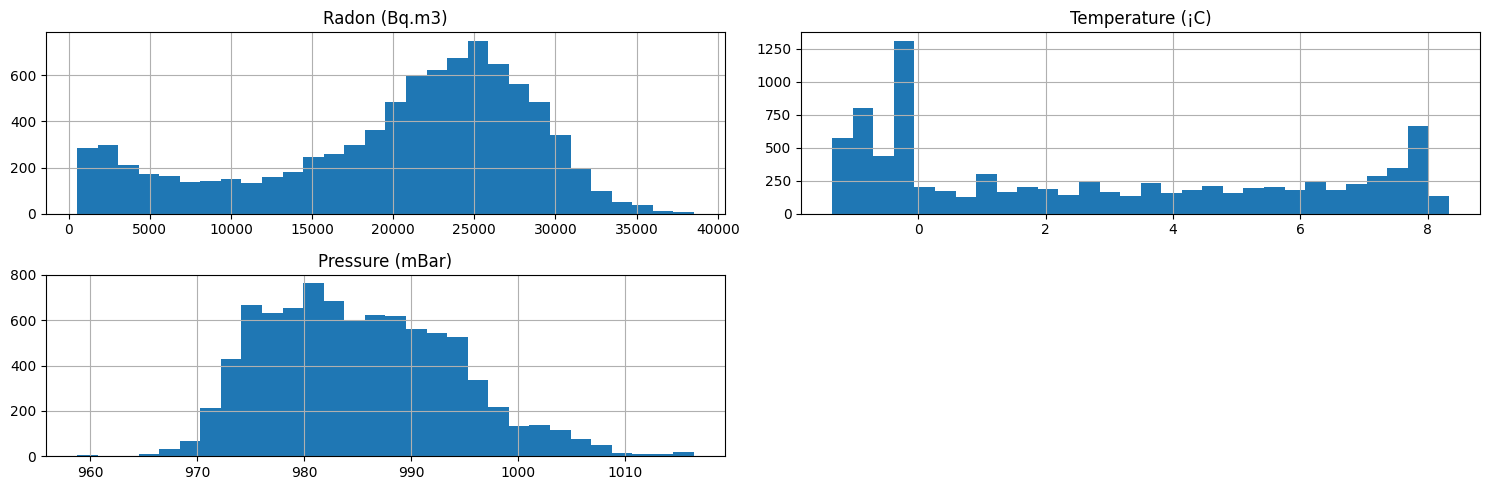

,Radon (Bq.m3),Temperature (¡C),Pressure (mBar)
count,8762.000000,8762.000000,8762.000000
mean,20022.478579,2.726995,985.274763
std,8623.103187,3.238559,8.782672
min,508.000000,-1.354161,958.782100
25%,15255.000000,-0.328124,978.377675
50%,22261.000000,2.059225,984.363240
75%,26329.000000,5.850701,991.461744
max,38533.000000,8.338097,1016.420816


In [8]:
# Анализ статистики
analyze_statistics(data)


Корреляции с радоном (включая запаздывающие переменные):
Radon (Bq.m3)        1.000000
Pressure_Lag_24h     0.376316
Pressure_Lag_48h     0.367599
Pressure_Lag_12h     0.267814
Pressure_Lag_168h    0.254946
Pressure_Lag_6h      0.160926
Temp_Lag_168h        0.103790
Temp_Lag_48h         0.080074
Temp_Lag_24h         0.074921
Temp_Lag_12h         0.072720
Temp_Lag_6h          0.071854
Temp_Lag_1h          0.069532
Temperature (¡C)     0.068956
Pressure_Lag_1h      0.023300
Pressure (mBar)     -0.000742
Name: Radon (Bq.m3), dtype: float64


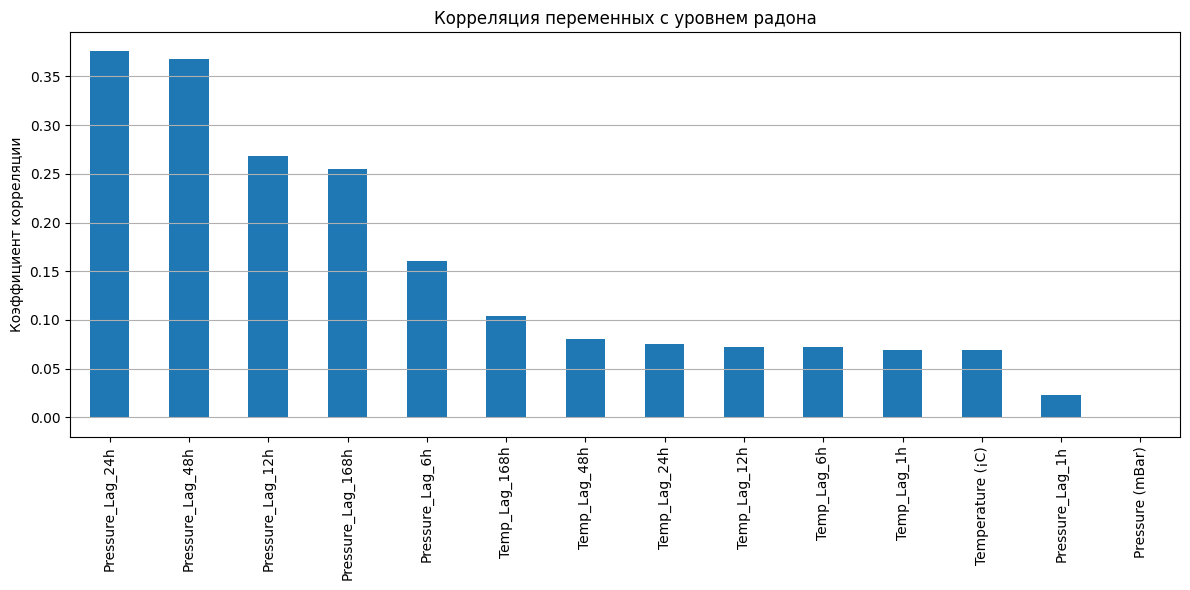

In [9]:
# Анализ лагов
lag_correlations = perform_lag_analysis(data)

Размерность последовательностей: X: (8757, 5, 2), y: (8757,)
Размерность обучающих данных: X_train: (7005, 5, 2), y_train: (7005,)
Размерность тестовых данных: X_test: (1752, 5, 2), y_test: (1752,)

Обучение модели LSTM...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0968 - val_loss: 0.0508
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0518 - val_loss: 0.0496
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0522 - val_loss: 0.0494
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0515 - val_loss: 0.0490
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0507 - val_loss: 0.0478
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0483 - val_loss: 0.0497
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0488 - val_loss: 0.0466
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0485 - val_loss: 0.0464
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0473 - val_loss: 0.0466
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0488 - val_loss: 0.0472
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0488 - val_loss: 0.0462
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss

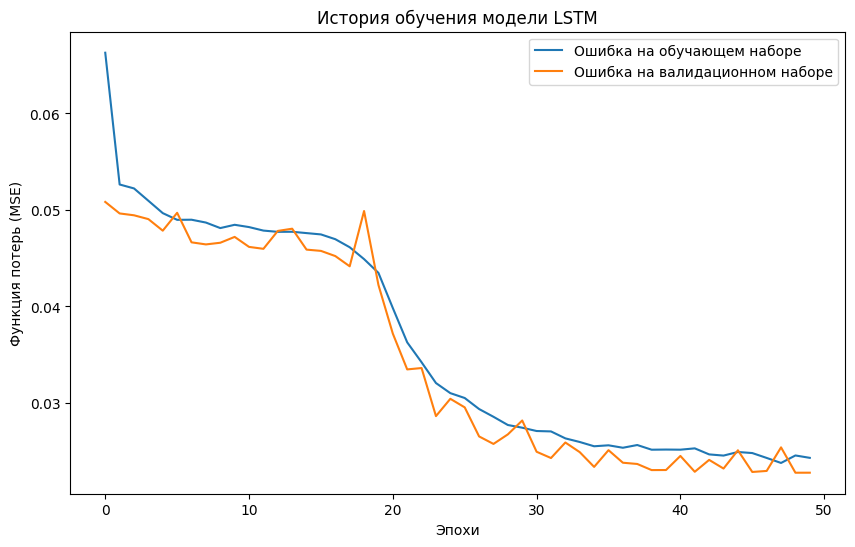

Модель сохранена в saved_models/model_lstm_20250407_0741.h5
История обучения сохранена в saved_models/history_lstm_20250407_0741.json

Обучение модели GRU...
Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.1132 - val_loss: 0.0490
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0529 - val_loss: 0.0479
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0517 - val_loss: 0.0497
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0507 - val_loss: 0.0503
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0502 - val_loss: 0.0466
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0494 - val_loss: 0.0467
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0499 - val_loss: 0.0456
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0466 - val_loss: 0.0466
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0477 - val_loss: 0.0450
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.04

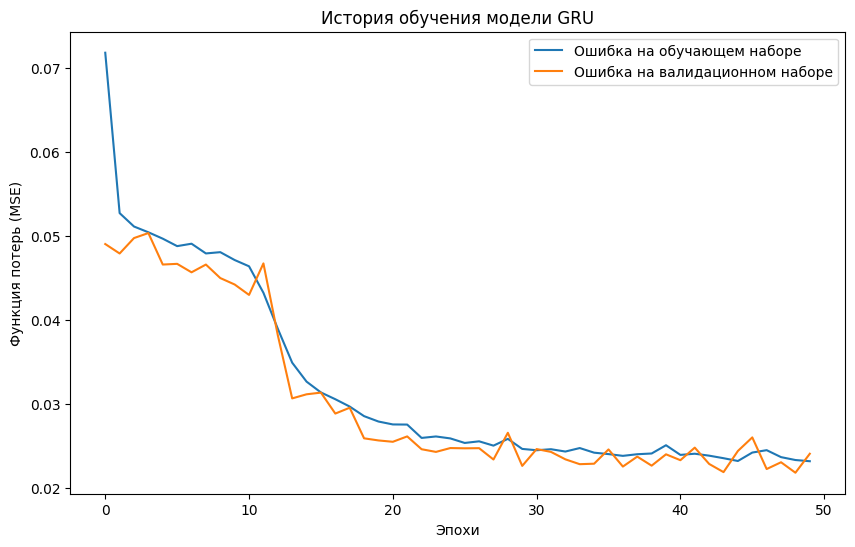

Модель сохранена в saved_models/model_gru_20250407_0743.h5
История обучения сохранена в saved_models/history_gru_20250407_0743.json

Обучение модели BIDIRECTIONAL...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0926 - val_loss: 0.0504
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0527 - val_loss: 0.0489
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0519 - val_loss: 0.0471
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0489 - val_loss: 0.0479
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0476 - val_loss: 0.0487
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0478 - val_loss: 0.0466
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0476 - val_loss: 0.0456
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0488 - val_loss: 0.0475
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0473 - val_loss: 0.0467
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0454 - val_loss: 0.0467
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0487 - val_loss: 0.0435
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/st

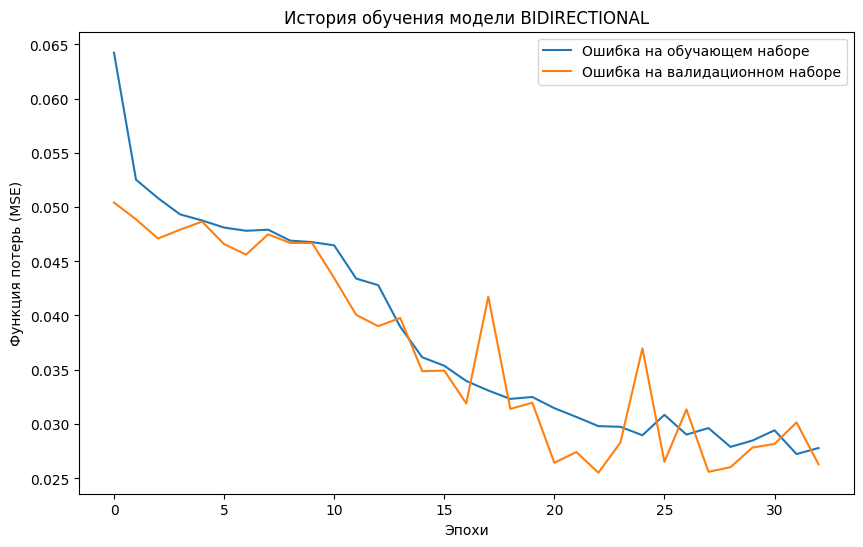

Модель сохранена в saved_models/model_bidirectional_20250407_0745.h5
История обучения сохранена в saved_models/history_bidirectional_20250407_0745.json

Лучшая модель по валидационной ошибке: GRU
Лучшая модель сохранена в saved_models/model_gru_best_20250407_0745.h5


In [10]:
# Подготовка данных
X, y, X_train, X_test, y_train, y_test, scaler = prepare_data(data)

# Обучение моделей (с сохранением)
models, histories, best_model, saved_paths = train_models(X_train, y_train)

In [11]:
# Вывод путей сохраненных моделей
print("\nСохраненные модели и истории обучения:")
for model_type, paths in saved_paths.items():
    if model_type != 'best':
        print(f"{model_type.upper()}:")
        print(f"  Модель: {paths['model']}")
        print(f"  История: {paths['history']}")
    else:
        print(f"Лучшая модель: {paths}")


Сохраненные модели и истории обучения:
LSTM:
  Модель: saved_models/model_lstm_20250407_0741.h5
  История: saved_models/history_lstm_20250407_0741.json
GRU:
  Модель: saved_models/model_gru_20250407_0743.h5
  История: saved_models/history_gru_20250407_0743.json
BIDIRECTIONAL:
  Модель: saved_models/model_bidirectional_20250407_0745.h5
  История: saved_models/history_bidirectional_20250407_0745.json
Лучшая модель: saved_models/model_gru_best_20250407_0745.h5



Оценка модели LSTM...
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Среднеквадратичная ошибка (MSE): 32101792.23
Корень из среднеквадратичной ошибки (RMSE): 5665.84
Средняя абсолютная ошибка (MAE): 4379.24
Коэффициент детерминации (R²): 0.5697


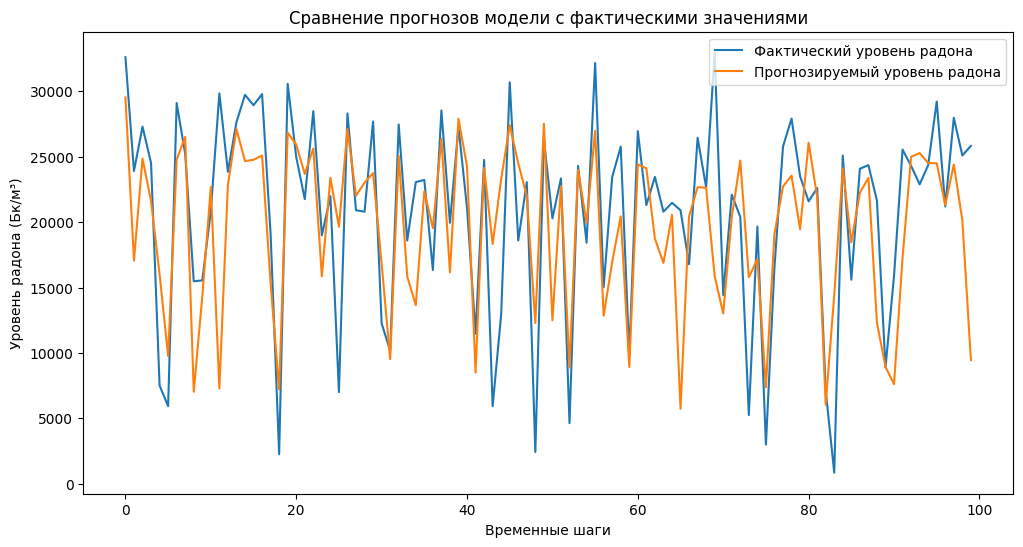


Оценка модели GRU...
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Среднеквадратичная ошибка (MSE): 31517958.36
Корень из среднеквадратичной ошибки (RMSE): 5614.09
Средняя абсолютная ошибка (MAE): 4277.67
Коэффициент детерминации (R²): 0.5775


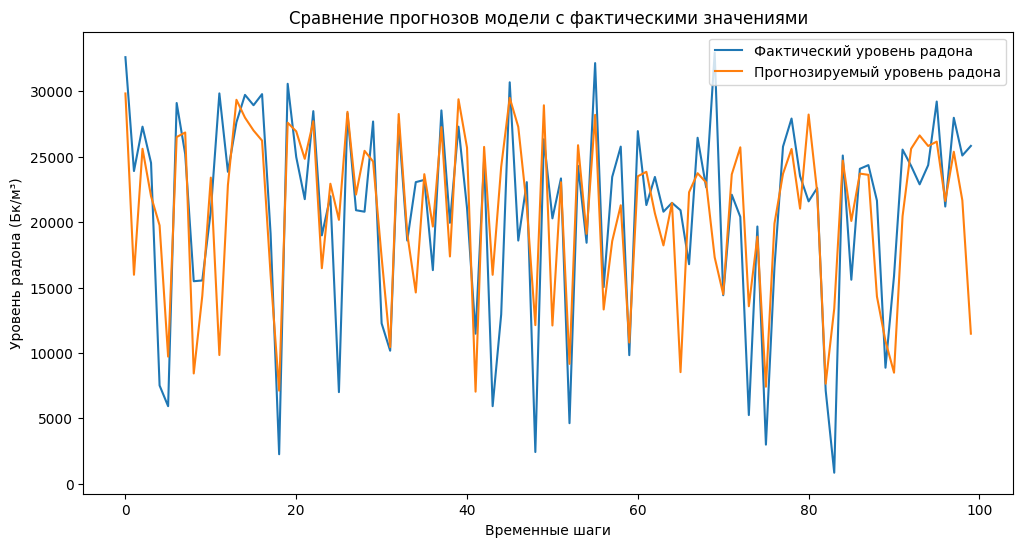


Оценка модели BIDIRECTIONAL...
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Среднеквадратичная ошибка (MSE): 36226657.30
Корень из среднеквадратичной ошибки (RMSE): 6018.86
Средняя абсолютная ошибка (MAE): 4758.29
Коэффициент детерминации (R²): 0.5144


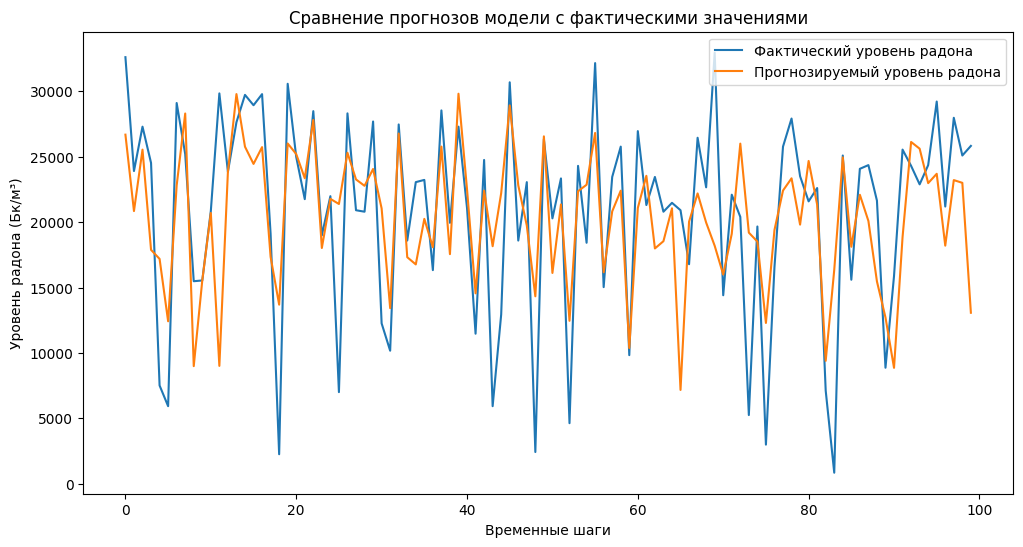

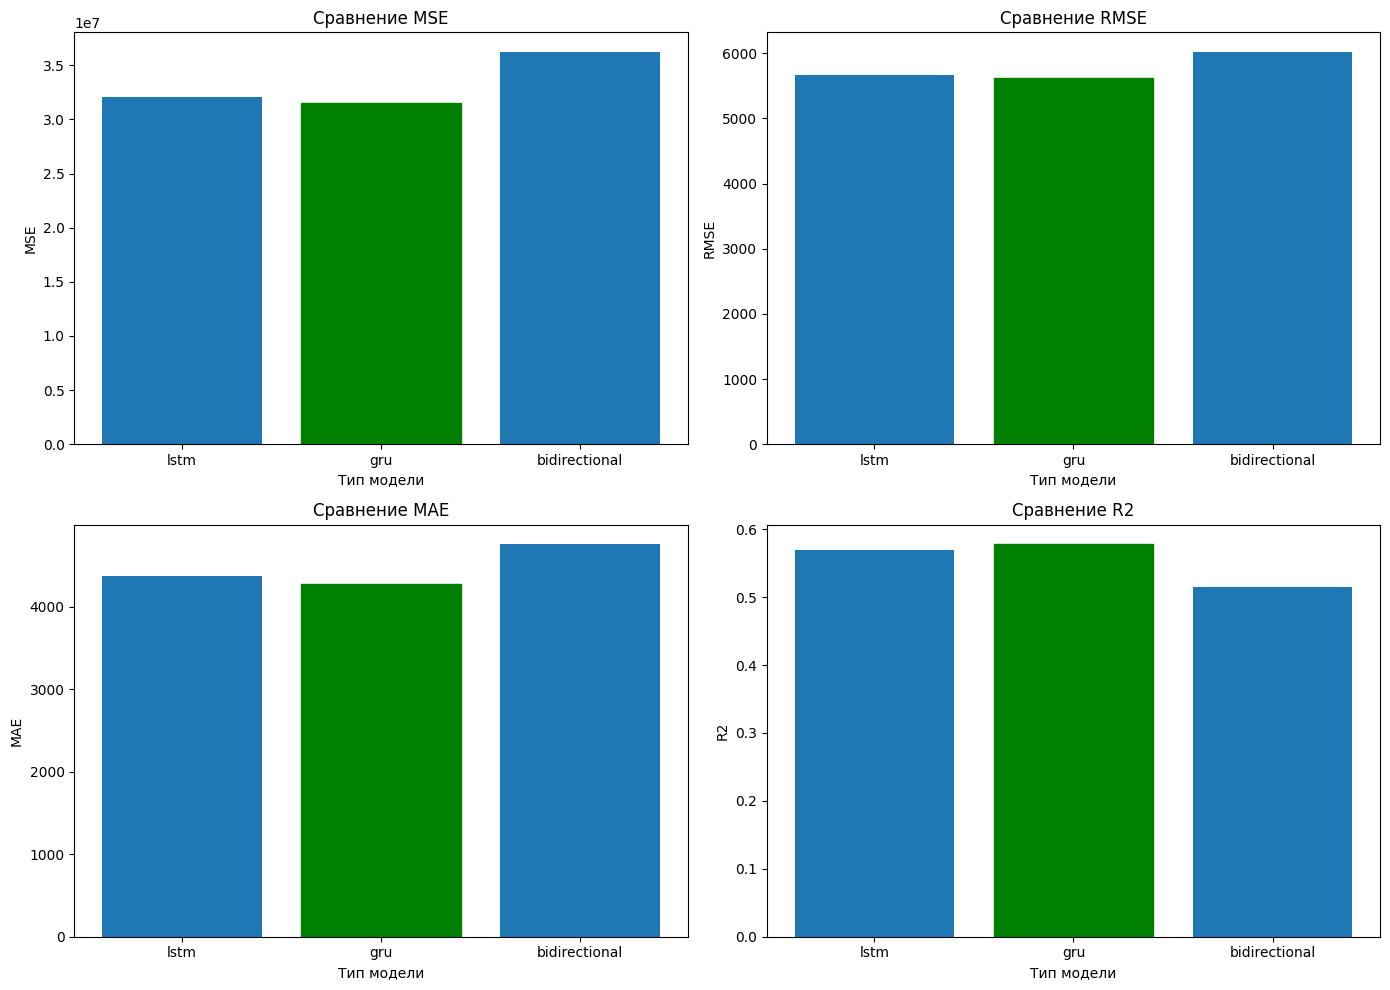

{'lstm': {'mse': 32101792.22972945,
  'rmse': np.float64(5665.844352762389),
  'mae': 4379.237803821107,
  'r2': 0.5696748934072036},
 'gru': {'mse': 31517958.355592806,
  'rmse': np.float64(5614.085709676403),
  'mae': 4277.6735448192585,
  'r2': 0.5775011970703264},
 'bidirectional': {'mse': 36226657.297182426,
  'rmse': np.float64(6018.858471270314),
  'mae': 4758.28622265542,
  'r2': 0.5143810024266016}}

In [12]:
# Оценка моделей
evaluate_all_models(models, X_test, y_test, scaler)

In [13]:
# Прогнозирование
predictions, future_predictions = make_predictions(best_model, data)

Используются колонки: радон='Radon (Bq.m3)', температура='Temperature (¡C)', давление='Pressure (mBar)'
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Создано 8757 прогнозов для существующих данных
Создано 24 прогнозов на будущее


In [14]:
# Интерактивная визуализация результатов с помощью Plotly
fig = plot_predictions(data, predictions, future_predictions)
fig.show()

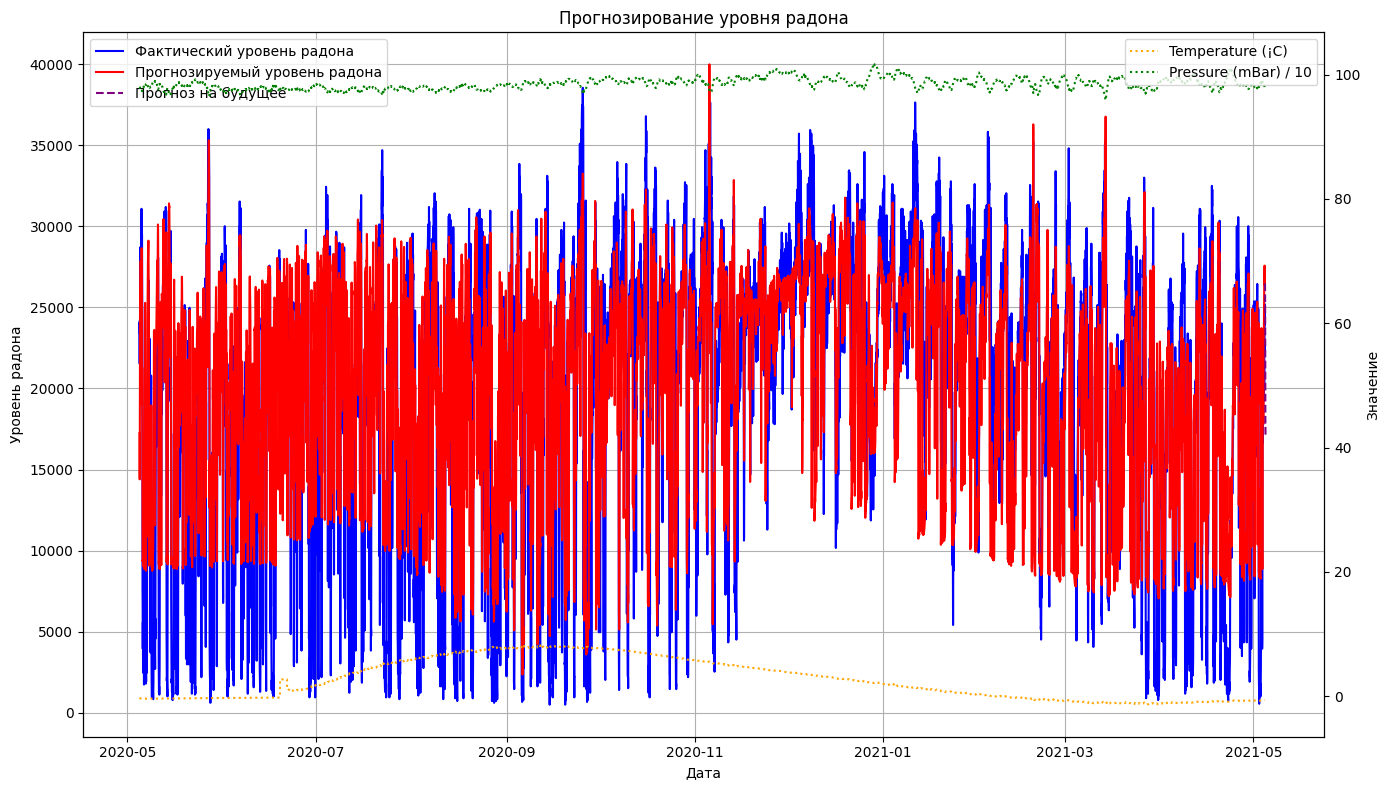

In [15]:
# Или для статической визуализации
plot_predictions_static(data, predictions, future_predictions)